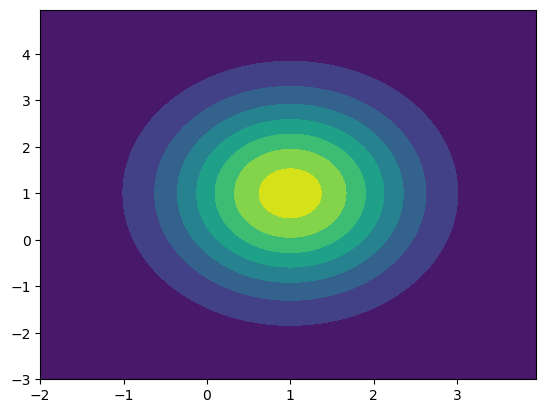

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


# 3.1
def plot_normal(mean, cov, scale):
    x, y = scale
    pos = np.dstack((x, y))
    rv = multivariate_normal(mean, cov)
    ax = plt.figure().add_subplot(111)
    ax.contourf(x, y, rv.pdf(pos))

plot_normal([1,1], [[1,0],[0,2]], np.mgrid[-2:4:.05, -3:5:.05])

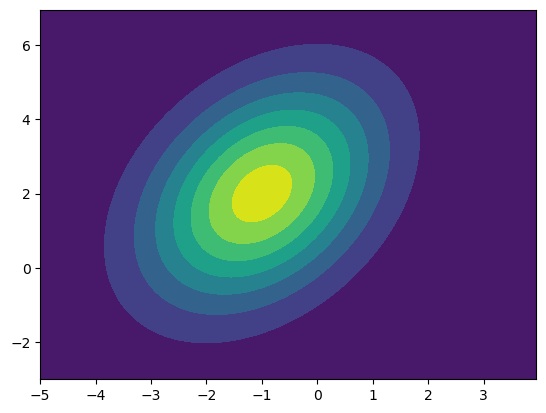

In [86]:
# 3.2
def plot_normal(mean, cov, scale):
    x, y = scale
    pos = np.dstack((x, y))
    rv = multivariate_normal(mean, cov)
    ax2 = plt.figure().add_subplot(111)
    ax2.contourf(x, y, rv.pdf(pos))

plot_normal([-1,2],[[2,1],[1,4]], np.mgrid[-5:4:.05, -3:7:.05])

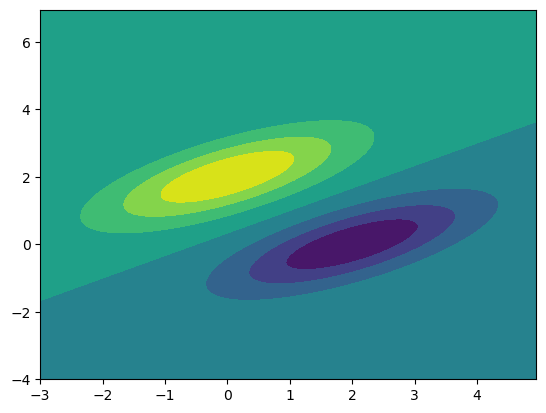

In [78]:
# 3.3
def plot_normal_dif(mean1, mean2, cov1, cov2, scale):
    x, y = scale
    pos = np.dstack((x, y))
    rv1 = multivariate_normal(mean1, cov1)
    rv2 = multivariate_normal(mean2, cov2)
    ax2 = plt.figure().add_subplot(111)
    ax2.contourf(x, y, rv1.pdf(pos) - rv2.pdf(pos))

plot_normal_dif([0,2], [2,0], [[2,1], [1,1]], [[2,1],[1,1]], np.mgrid[-3:5:.05, -4:7:.05])

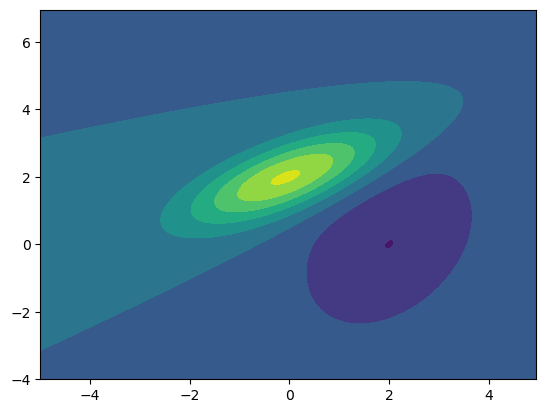

In [85]:
# 3.4

plot_normal_dif([0,2], [2,0], [[2,1], [1,1]], [[2,1],[1,4]], np.mgrid[-5:5:.05, -4:7:.05])

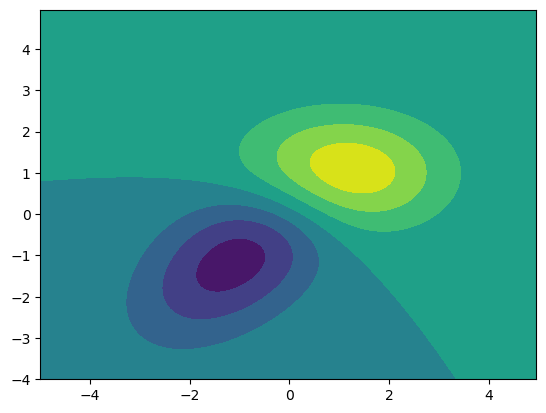

In [84]:
# 3.5

plot_normal_dif([1,1], [-1,-1], [[2,0], [0,1]], [[2,1],[1,2]], np.mgrid[-5:5:.05, -4:5:.05])

In [107]:
# 4.1 Compute mean of sample points.

np.random.seed(306)

mu1, sigma1 = 3, 3
mu2, sigma2 = 4, 2
X1 = np.random.normal(mu1, sigma1, 100)
X2 = np.dot(X1, 0.5) + np.random.normal(mu2, sigma2, 100)

mean = (np.average(X1), np.average(X2))
print(mean)

(3.2527885454529595, 5.187409318687432)


In [125]:
# 4.2 Compute the 2 × 2 covariance matrix of the sample
    
def compute_cov(mu1, mu2, X1, X2):
    cov = 0
    for i in range(100):
        cov += (X1[i] - mu1) * (X2[i] - mu2)
    return cov / len(X1)
      
mu1, mu2 = mean[0], mean[1]
cov_X1_X1 = compute_cov(mu1, mu1, X1, X1)
cov_X2_X2 = compute_cov(mu2, mu2, X2, X2)
cov_X1_X2 = compute_cov(mu1, mu2, X1, X2)
    
cov_matrix = [[cov_X1_X1, cov_X1_X2],[cov_X1_X2, cov_X2_X2]]
print(cov_matrix)

[[8.703869915403628, 4.514329706946918], [4.514329706946918, 6.4791358210652925]]


In [127]:
# 4.3 Compute eigenvectors and eigenvalues of covariance matrix.

from numpy import linalg as LA
eigenvalues, eigenvectors = LA.eig(cov_matrix)
print(eigenvalues)
print(eigenvectors)

[12.24086123  2.94214451]
[[ 0.78716318 -0.61674479]
 [ 0.61674479  0.78716318]]


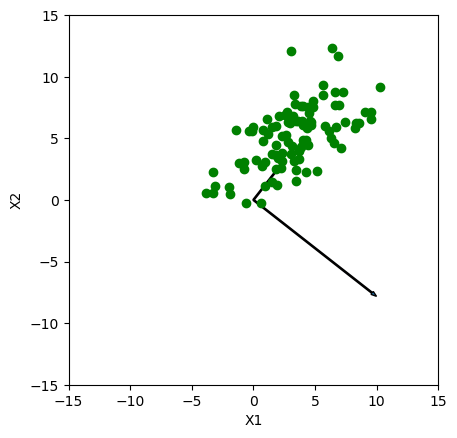

In [175]:
# 4.4 Plot sample points and eigenvectors

eigenvector1, eigenvector2 = eigenvectors[0] * eigenvalues[0], eigenvectors[1] * eigenvalues[1]
plt.arrow(0, 0, eigenvector1[0], eigenvector1[1], width = 0.1)
plt.arrow(0, 0, eigenvector2[0], eigenvector2[1], width = 0.1)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('')

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.plot(X1, X2, 'go')

In [ ]:
# 4.5 

